# Assignment 5 (Week 5)

## Name: Theresa Louise Bazudde

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Built-in library
import itertools
import typing as tp

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


In [2]:
df = pd.read_csv('marketing_campaign.csv', sep="\t")

## Qs 1

### Part a

In [3]:
df['Avg_amount'] = df[['MntWines', 'MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].agg('mean', axis=1)
df['Total_amount'] = df[['MntWines', 'MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].agg('sum', axis=1)

### Part b

In [4]:
df['Avg_amount(weights)'] = pd.qcut(df['Avg_amount'], 10, labels=False)

In [5]:
#Answer
df[["Total_amount", "Avg_amount", "Avg_amount(weights)"]].sample(n=5, random_state=2)

,Total_amount,Avg_amount,Avg_amount(weights)
2053,71,11.833333,2
2019,22,3.666667,0
1891,2069,344.833333,9
335,946,157.666667,7
1600,562,93.666667,5


## Qs 2. 

### Part a

In [6]:
df['Percentage_income'] = ((df['Total_amount']/df['Income'])*100)

In [7]:
#Answer
df[["Percentage_income"]].sample(n=5, random_state=2)

,Percentage_income
2053,0.192271
2019,0.072701
1891,2.339968
335,1.520803
1600,1.043775


### Part b

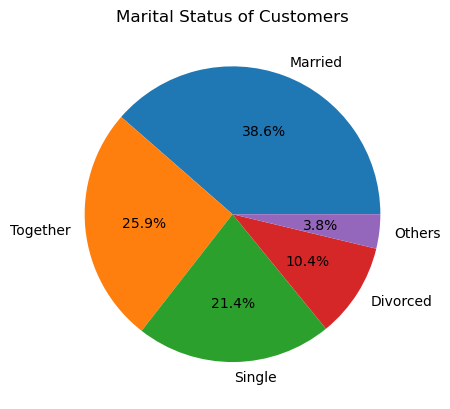

In [8]:
#A function to categorize the marital status
def categorize_marital_status(status):
    """
    Categorizes marital status into "single", "married", "divorced", or "Others".

    Args:
    status (str): A string representing the marital status of a customer.

    Returns:
    A string representing the appropriate category for the marital status. 
    If the status is "married" ,"single","divorced","together", 
    the function returns the same status. If the status is not one of these
    three, the function returns "Others".
    """
    if status in ['Single','Married', 'Divorced', 'Together']:
        return status
    else:
        return 'Others'
df['Marital_Status'] = df['Marital_Status'].apply(categorize_marital_status)

#Plotting the pie chart
marital_counts = df['Marital_Status'].value_counts()
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%')
plt.title('Marital Status of Customers')
plt.show()


## Qs 3. 

### Part a

In [9]:
df['Recency(weights)'] = pd.qcut(df['Recency'], 10, labels=False)

#Answer
df[["Recency(weights)", "Recency"]].sample(n=5, random_state=2)

,Recency(weights),Recency
2053,4,46
2019,7,75
1891,8,87
335,3,38
1600,6,64


### Part b

In [10]:
#Creating column to count campaign accepts 
df['Total_accepts'] = df[['AcceptedCmp5', 'AcceptedCmp4', 'AcceptedCmp3', 'AcceptedCmp2', 'AcceptedCmp1', 'Response']].agg('sum', axis=1)

#Counting the customers and accepts greater than one
acclen = len(df[df['Total_accepts'].map(lambda x: x >= 1)])
cus_count = len(df['ID'])
percent_accpt = (acclen/cus_count)*100

#Answer
print("{}% accepted the campaign".format(round(percent_accpt, 2)))

27.19% accepted the campaign


## Qs 4.  

### Part a

In [11]:
df["Total_purchases"] = df[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].agg('sum', axis=1)

### Part b

In [12]:
df["Frequency(weights)"] = pd.qcut(df['Total_purchases'], 10, labels=False)

#Answer
df[["Total_purchases", "Frequency(weights)"]].sample(n=5, random_state=2)

,Total_purchases,Frequency(weights)
2053,8,2
2019,4,0
1891,20,6
335,22,7
1600,20,6


## Qs 5. 

### Part a

In [13]:
df["RFM"] = df[['Recency(weights)','Frequency(weights)','Avg_amount(weights)']].agg('sum', axis=1)

### Part b

In [14]:
df["Customer_value"] = pd.qcut(df['RFM'], 3, labels=['low_value','medium_value','high_value'])

In [15]:
#Answer
df[["Recency(weights)", "Frequency(weights)", "Avg_amount(weights)", "RFM", "Customer_value"]].sample(n=10, random_state=2)

,Recency(weights),Frequency(weights),Avg_amount(weights),RFM,Customer_value
2053,4,2,2,8,low_value
2019,7,0,0,7,low_value
1891,8,6,9,23,high_value
335,3,7,7,17,medium_value
1600,6,6,5,17,medium_value
1459,6,6,5,17,medium_value
2161,7,4,4,15,medium_value
1026,5,1,3,9,low_value
68,0,6,6,12,medium_value
2088,1,2,2,5,low_value
